scratch notebook for testing things

In [1]:
import torch
import numpy as np
from torchvision.datasets import MNIST
from torchvision.transforms import v2

from implementations.byol import run_byol_train
from implementations.configs import get_mini_byol_config
from implementations.utils import make_simclr_augment_fn

In [2]:
config = get_mini_byol_config()
config["base_class"] = "resnet18"
config["projection_head_kwargs"]["in_features"] = 512
config["augment_fn"] = make_simclr_augment_fn(
    image_size=(28, 28),
    do_color_distort=False,
    crop_scale=(0.2, 1)
)

dataset = MNIST(
    root="./data",
    train=True,
    transform=v2.Compose([
        v2.PILToTensor(),
        v2.ToDtype(torch.float32, scale=True)
    ]),
    download=True
)

In [3]:
result = run_byol_train(dataset, config)

Training: 100%|██████████| 1000/1000 [17:07:30<00:00, 61.65s/epoch, epoch=1000, train_loss=0.207]


In [17]:
encoder = result["online"][0].eval()

In [20]:
with torch.no_grad():
    embeddings = encoder(torch.stack([data[0] for data in dataset]).to("cuda:0")).cpu()

labels = torch.tensor([data[1] for data in dataset])

In [23]:
from umap import UMAP

In [27]:
umap = UMAP(
    n_neighbors=15,
    min_dist=0.1
)
U = umap.fit_transform(embeddings, labels)

c:\Users\Nobe\miniconda3\envs\mlenv2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Nobe\miniconda3\envs\mlenv2\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


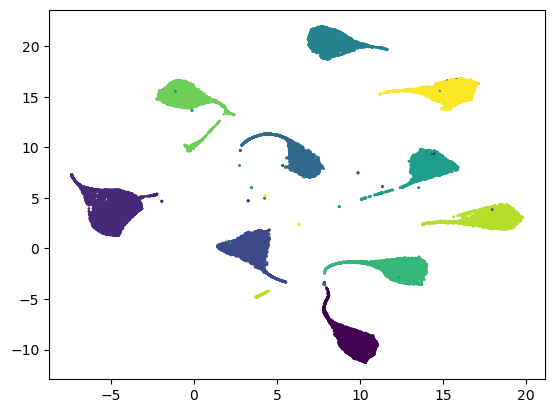

In [28]:
import matplotlib.pyplot as plt
plt.scatter(*U.T, s=1, c=labels)